# PricePulse: Inflation Insights & EDA

This notebook analyzes the processed CPI data to identify inflation drivers, volatility, and trends.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load Data
df = pd.read_csv('../data/processed/inflation_features.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,series_id,category,value,MoM_Inflation,YoY_Inflation,Rolling_3M_MoM,Rolling_6M_MoM,Volatility_6M
0,2015-02-01,CUUR0000SAA,Apparel,124.457,1.575163,NaN,NaN,NaN,NaN
1,2015-03-01,CUUR0000SAA,Apparel,128.245,3.043621,NaN,NaN,NaN,NaN
2,2015-04-01,CUUR0000SAA,Apparel,128.593,0.271356,NaN,1.630047,NaN,NaN
3,2015-05-01,CUUR0000SAA,Apparel,127.083,-1.174247,NaN,0.713577,NaN,NaN
4,2015-06-01,CUUR0000SAA,Apparel,124.954,-1.675283,NaN,-0.859392,NaN,NaN


## 1. Trend Analysis: YoY Inflation
Compare Headline CPI vs. Core Categories (Food, Energy, Shelter).

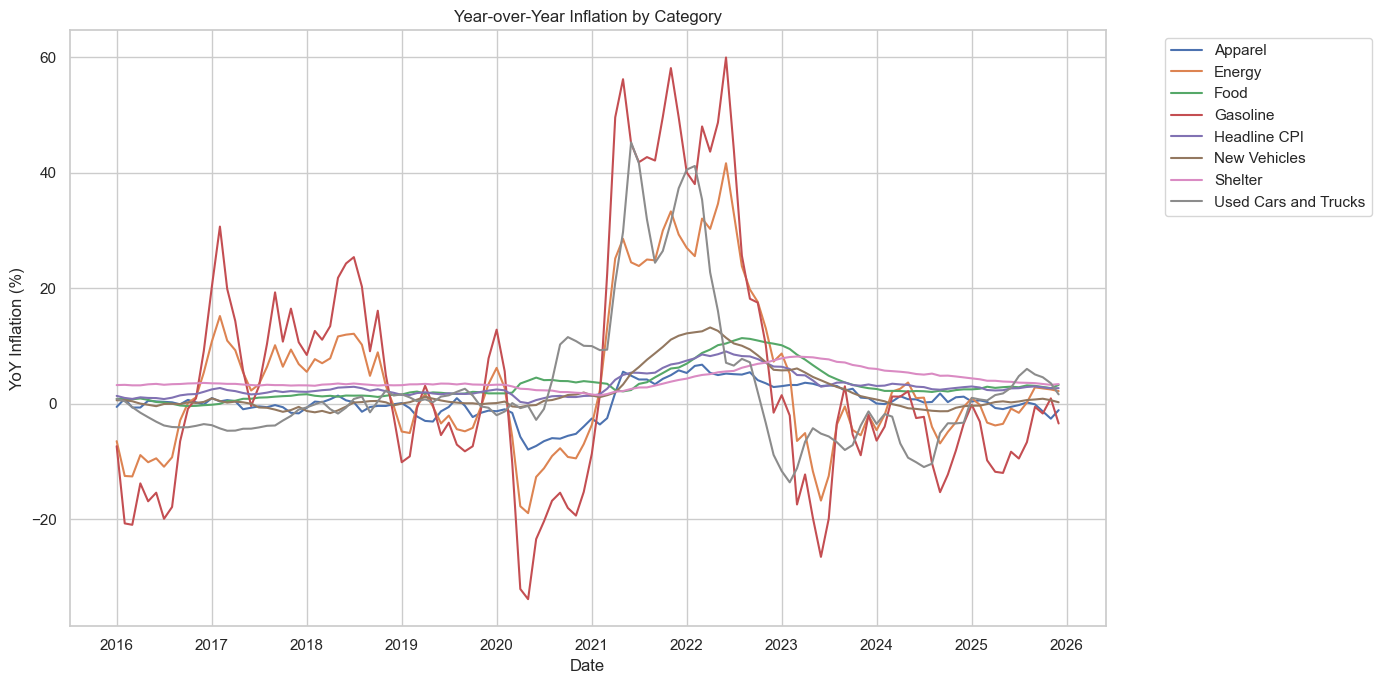

In [3]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='YoY_Inflation', hue='category')
plt.title('Year-over-Year Inflation by Category')
plt.ylabel('YoY Inflation (%)')
plt.xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 2. Volatility Analysis
Which categories are the most volatile? (Standard Deviation of MoM Inflation)

/var/folders/72/pv5wnsts00schnl2k5rzbc7r0000gn/T/ipykernel_48274/2550171597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility.values, y=volatility.index, palette='viridis')


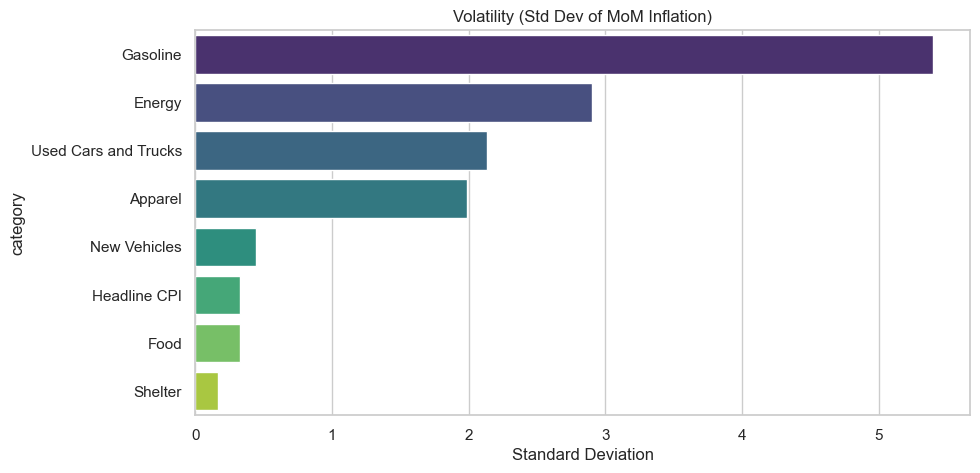

In [4]:
volatility = df.groupby('category')['MoM_Inflation'].std().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=volatility.values, y=volatility.index, palette='viridis')
plt.title('Volatility (Std Dev of MoM Inflation)')
plt.xlabel('Standard Deviation')
plt.show()

## 3. Inflation Heatmap
Visualize inflation intensity over time.

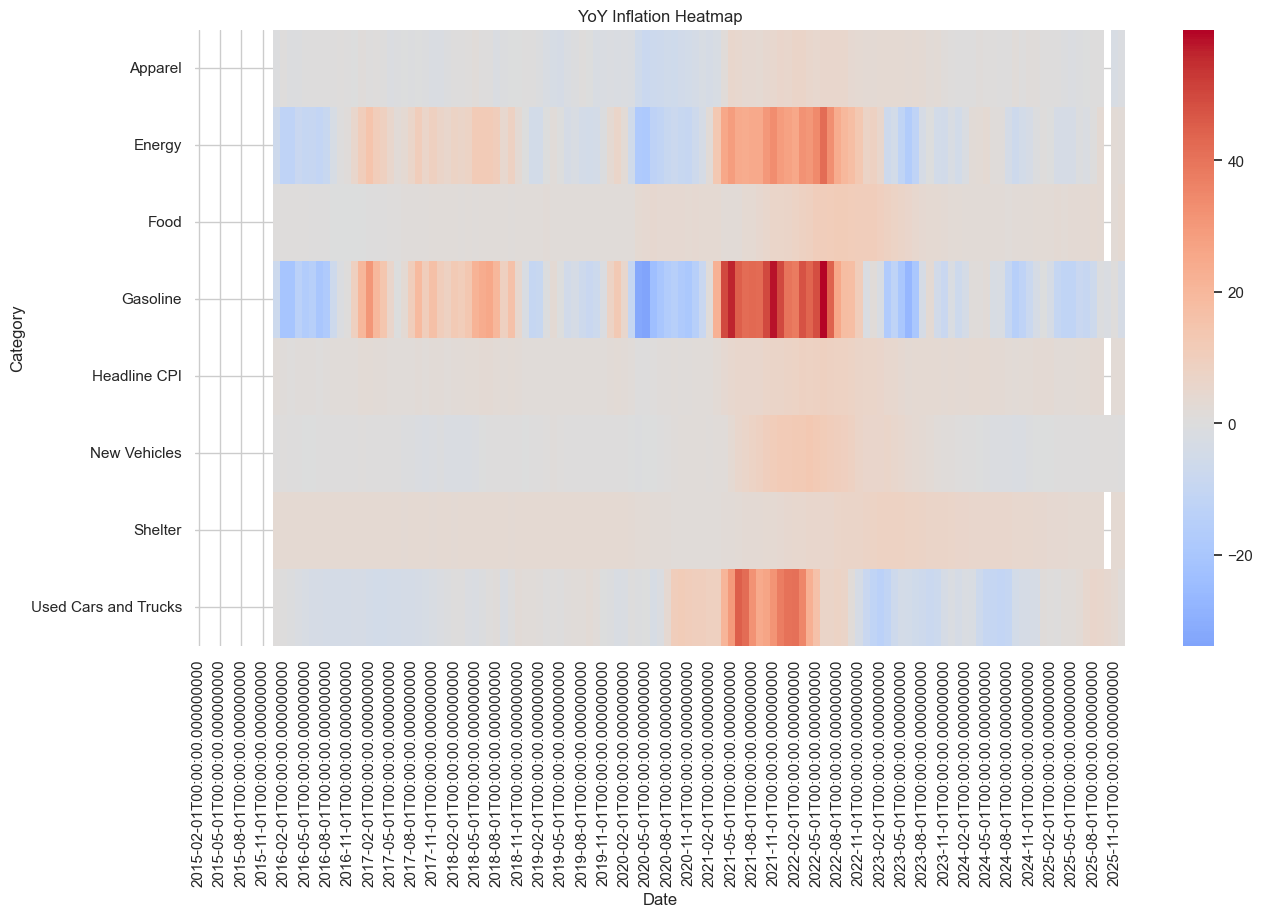

In [5]:
pivot_inflation = df.pivot(index='category', columns='date', values='YoY_Inflation')

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_inflation, cmap='coolwarm', center=0)
plt.title('YoY Inflation Heatmap')
plt.xlabel('Date')
plt.ylabel('Category')
plt.show()

## 4. Key Insights
Identify recent trends.

In [6]:
recent_date = df['date'].max()
latest_data = df[df['date'] == recent_date].sort_values('YoY_Inflation', ascending=False)

print(f"Latest Data: {recent_date.date()}")
print(latest_data[['category', 'YoY_Inflation', 'MoM_Inflation']])

Latest Data: 2025-12-01
                  category  YoY_Inflation  MoM_Inflation
911                Shelter       3.417600       0.368138
389                   Food       3.271514       0.606928
650           Headline CPI       2.713531      -0.020980
259                 Energy       2.206455      -1.951801
1042  Used Cars and Trucks       1.634899      -1.664458
781           New Vehicles       0.271470      -0.302954
129                Apparel      -1.096170      -1.264613
520               Gasoline      -3.399380      -5.318086
